In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import src.transform as transform

tf.compat.v1.disable_eager_execution()

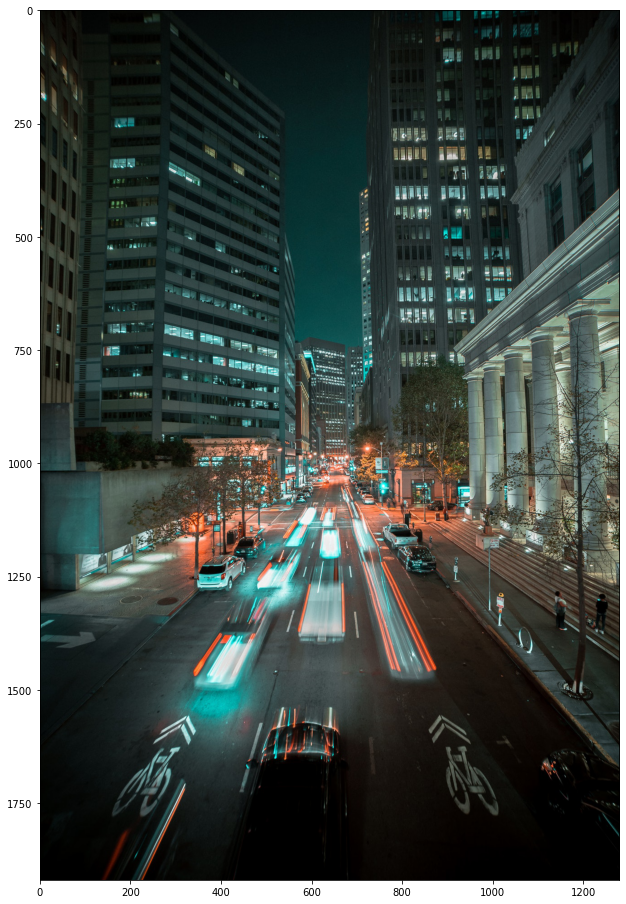

In [68]:
img = Image.open('imgs/08.jpg')
img = np.array(img)

plt.figure(figsize=(16, 16))
plt.imshow(img)

INFO:tensorflow:Restoring parameters from models/rain_princess.ckpt


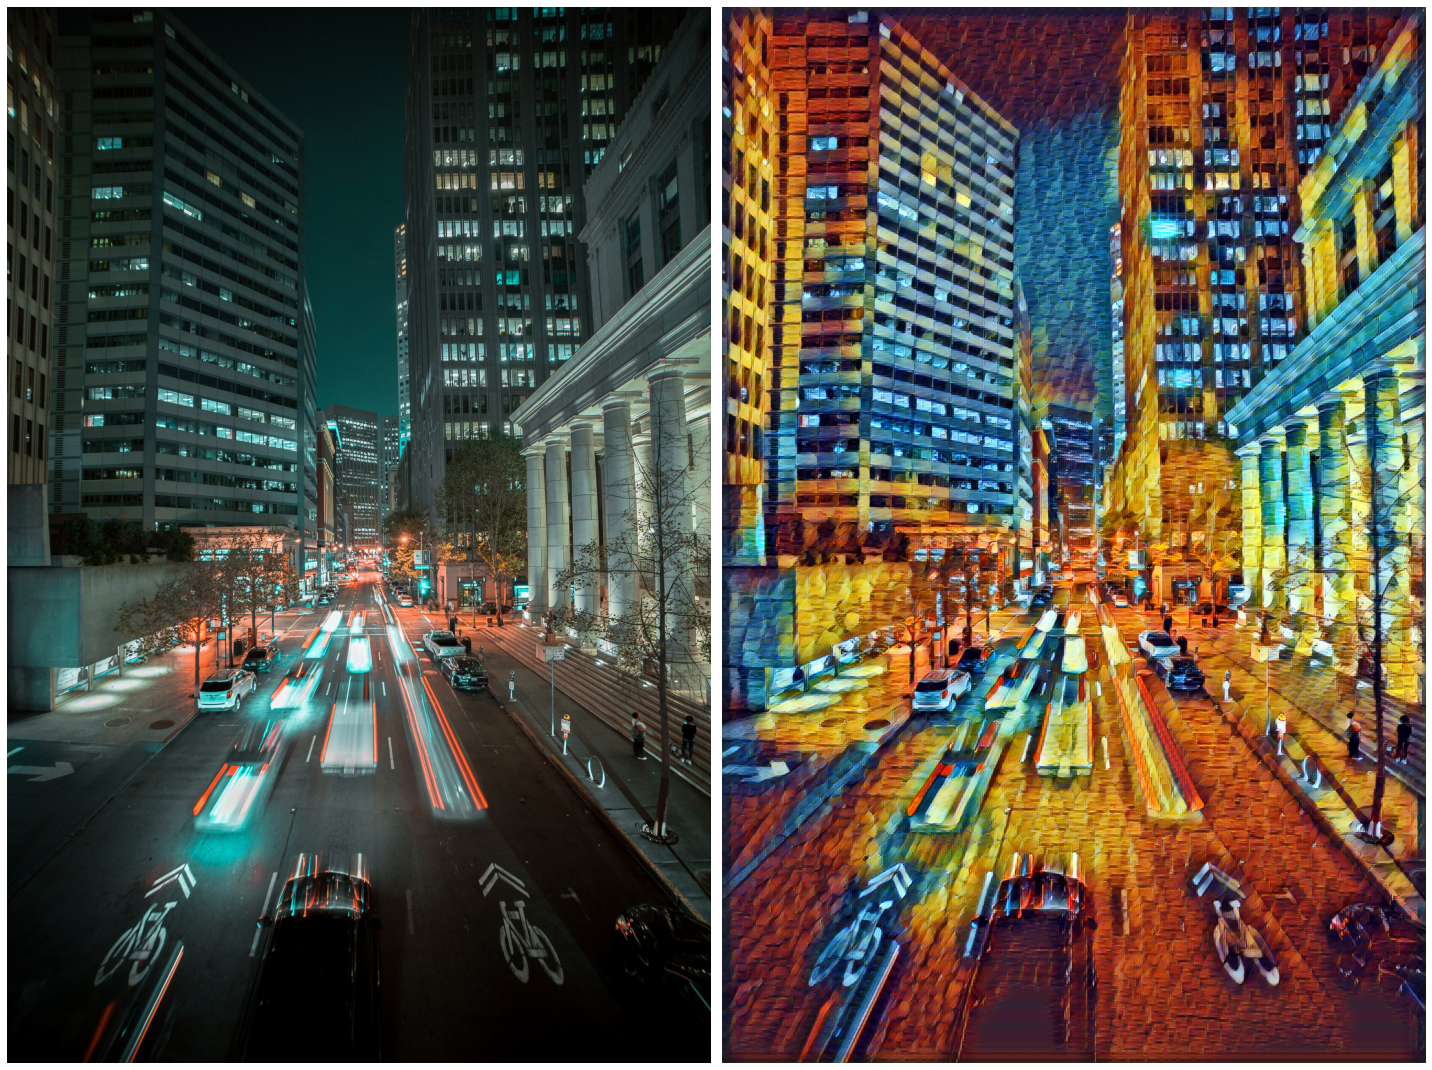

In [87]:
with tf.Graph().as_default(), tf.compat.v1.Session() as sess:
    batch_shape = (1, img.shape[0], img.shape[1], img.shape[2])
    img_placeholder = tf.compat.v1.placeholder(tf.float32, shape=batch_shape, name='img_placeholder')

    net = transform.net(img_placeholder)
    saver = tf.compat.v1.train.Saver()
    saver.restore(sess, 'models/rain_princess.ckpt')
    
    y_pred = sess.run(net, feed_dict={img_placeholder: np.expand_dims(img, axis=0)})

    y_pred = np.clip(y_pred, 0, 255).astype(np.uint8).squeeze()
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 20))
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[1].imshow(y_pred)
    axes[1].axis('off')
    plt.tight_layout()

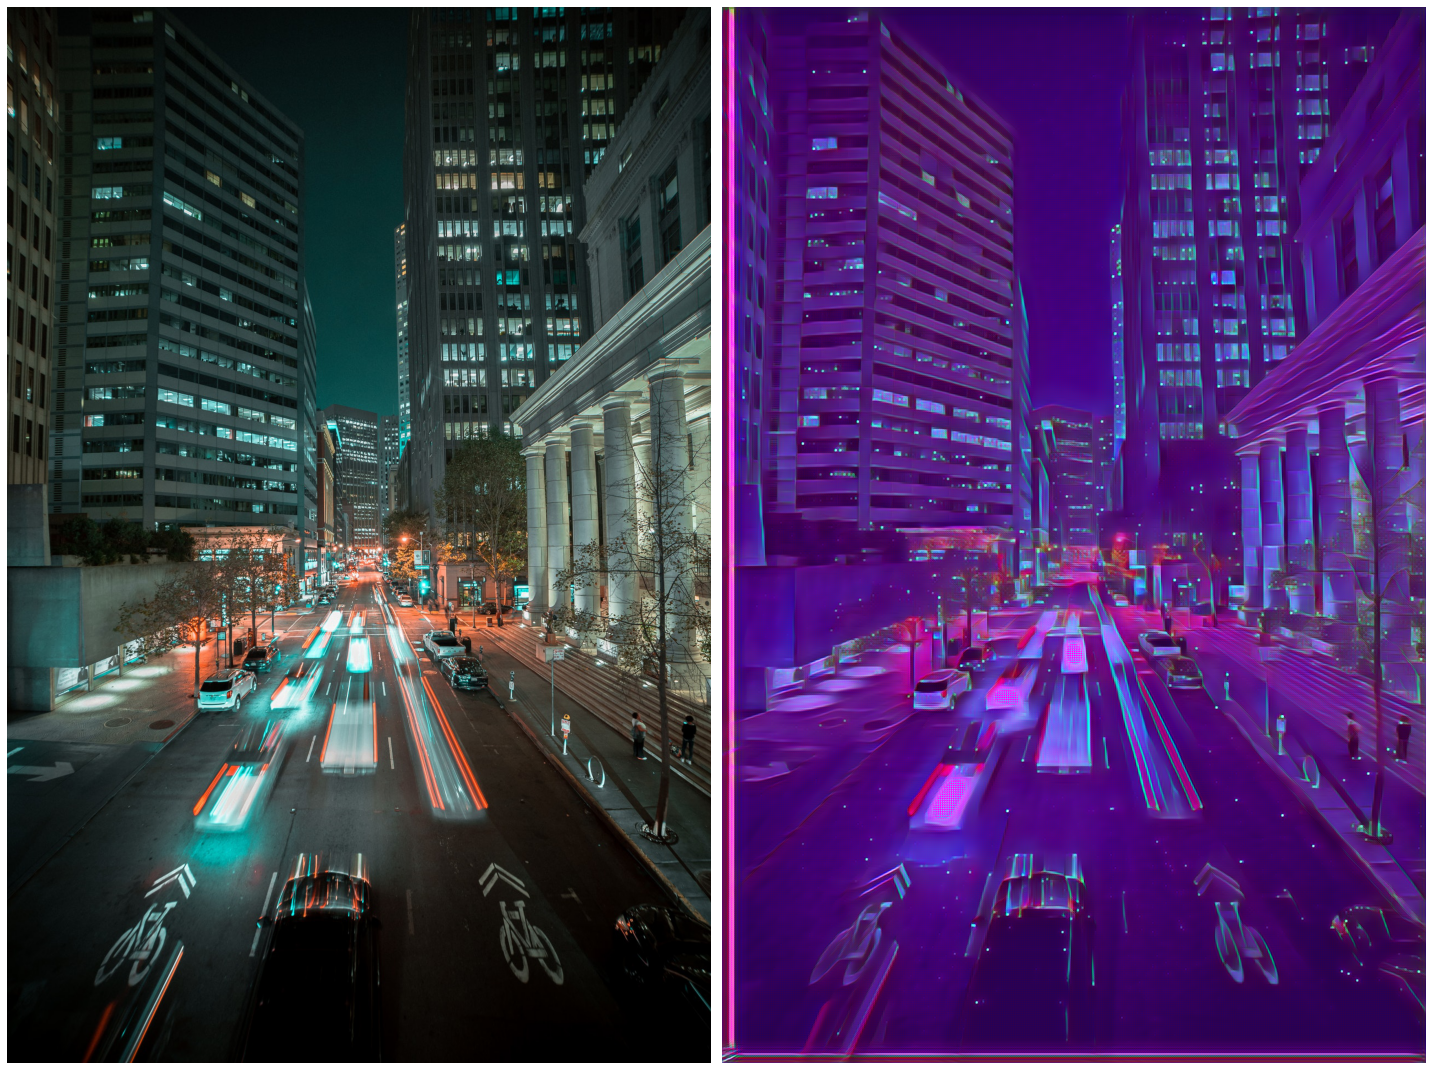

In [90]:
import cv2

net = cv2.dnn.readNetFromTensorflow('models/style04.pb')

blob = cv2.dnn.blobFromImage(img)
net.setInput(blob)
y_pred = net.forward()

y_pred = np.clip(y_pred, 0, 255).astype(np.uint8).squeeze().transpose((1, 2, 0))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(img)
axes[0].axis('off')
axes[1].imshow(y_pred)
axes[1].axis('off')
plt.tight_layout()